PROJECT MAINTAINED BY : **Sadig** Gojayev and **Javid** Guliyev _date 30-/12-2020

# **ARTIFICIAL INTELLIGENCE PROJECT**
## k-means++

Members: **SADiG GOJAYEV and JAViD GULiYEV**


In [ ]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random as rd
import time


# Data Preparing

In [ ]:
def create_data(points,coordinates,centers):

  data=[np.array([0]*coordinates)]*points
  data_x=np.array([0]*points)
  data_y=np.array([0]*points)

  data_c=[np.array([0]*(coordinates+2))]*k
  data_c_x=np.array([0]*k)
  data_c_y=np.array([0]*k)
  data_c_gx=np.array([0]*k, dtype=float)
  data_c_gy=np.array([0]*k, dtype=float)

  for point in range(points):
    data_x[point]=rd.randrange(0,1000)
    data_y[point]=rd.randrange(0,400)

  for i in range(k):
    j=rd.randrange(0,points)
    data_c_x[i]=rd.randrange(100,900)
    data_c_gx[i]=0.004
    data_c_y[i]=rd.randrange(35,250)
    data_c_gy[i]=0.003

  data = np.vstack((data_x, data_y)).T
  data_c = np.vstack((data_c_x,data_c_y,data_c_gx,data_c_gy)).T
  data = np.array(data, dtype=float)
  data_c = np.array(data_c,  dtype=float)

  return data , data_c


def data_praparing(data,data_c,k):
  
  class_data = {}
  for m in range(k):
    class_data[m]= []

  for i in range(len(data)):
    j=rd.randrange(0,k)  #Random centroid from 3
  
    gx = data_c[j][2]
    gy = data_c[j][3]
  
    x_data = data[i][0]
    y_data = data[i][1]
  
    A1 = 1/(gx*mt.sqrt(2*mt.pi))
    A2 = 1/(gy*mt.sqrt(2*mt.pi))
    
    data[i][0] = A1*mt.exp(-(((x_data-data_c[j][0])**2)/2*(gx**2)))+data_c[j][0]
    data[i][1] = A2*mt.exp(-(((y_data-data_c[j][1])**2)/2*(gy**2)))+data_c[j][1]
    class_data[j].append(data[i])

  return class_data,data

# **K-means++**

In [ ]:
def Centroids_plus(data, k, random_state=42):

    np.random.seed(random_state)
    centroids = [data[rd.randrange(0,100)]]
    
    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-d,c-d) for c in centroids]) for d in data])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        for j, prob in enumerate(cumulative_probs):
            if r < prob:
                i = j
                break
        
        centroids.append(data[i])
        

    return np.array(centroids)

    
def recalculate_clusters(D, centroids, k):
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    for data in D:
      euc_dist = []
      for j in range(k):
        euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
      clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters 


def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """
    for i in clusters:
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids        



def plot_clusters(Centroids,clusters,k):
  for Centroid in range(k):
    plt.scatter(Centroids[:,0], Centroids[:,1], s = 200, marker = "X")
  #Creating color features for plotting
  o = np.arange(10)
  os = [i+o+(i*o)**2 for i in range(20)]
  colors = cm.rainbow(np.linspace(0, 1, len(os))) 
  for cluster in clusters:
    c = colors[cluster*2]
    for features in clusters[cluster]:
      plt.scatter(features[0], features[1], color=c ,s = 30)
  plt.ylabel('Figure ', fontsize=16) 
  plt.show()   

## Fitting 32 k-means++ clusterings

In [ ]:

def k_means(k):
  Centroids= Centroids_plus(data, k , random_state=42)    
  for i in range (10):
    clusters=recalculate_clusters(data, Centroids, k)
    Centroids=recalculate_centroids(Centroids,clusters,k)
  return clusters, Centroids

def n_k_means_plot(k,n):
  clusters_list=[]
  for i in range(n):
    clusters, centroids = k_means(k) 
    plot_clusters(centroids,clusters,k)
    clusters_list.append(clusters)
  return clusters_list
def n_k_means(k,n):
  clusters_list=[]
  for i in range(n):
    clusters, centroids = k_means(k) 
    clusters_list.append(clusters)
  return clusters_list  

  

# **1st method**
# Measuring the diversity of n k-means++ clusterings

In [ ]:
def dict_tr(dict_ex):
  example=dict_ex
  for i in range(len(example)):
    for c in range(len(example[i])):
      example[i][c]=list(example[i][c])
  return example

In [ ]:
def clusters_list_tr(clusters_list):
  for clusters in clusters_list:
    clusters=dict_tr(clusters)
  return clusters_list

## Entropy

In [ ]:
def entropy(clusters_list):
  k=len(clusters_list[0])
  entropy_list=[]
  for i in range( len(clusters_list) ):
    entropy = np.zeros(k)
    H = 0
    for j in range(k):
      cluster=np.array( clusters_list[i][j] )
      u,counts = np.unique(cluster,return_counts = True,axis=0)
      prob_all=0
      h = np.zeros(k)
      for z in range(len(u)):
        prob=counts[z]/len(cluster)
        # print(prob)
        h[j] += - (  prob * mt.log (prob,2) )
        prob_all += prob
      # print(prob_all)   
      entropy[j]=h[j]
      H+=(h[j]*len(cluster))/100  
    entropy_list.append(round(H,4))
  entropy_list=np.array(entropy_list)
  # print(entropy_list)
  uniq_list=np.unique(entropy_list)
  # print(uniq_list)
  entropy=mt.log(len(uniq_list),2)  
  return entropy  

In [ ]:
clusters_list = n_k_means(100 , 32)
ent = entropy(clusters_list)   # Entropy of n k-means of n different initiral centr points clustering 
print("Entropy of 32 100_means with 32 different centres " + str(ent))

Entropy of 32 100_means with 32 different centres 0.0


# **2nd method**
# Measuring the quality of the clusters

## Density


In [ ]:
def density(clusters_list):
  
  k=len( clusters_list[0] )
  density_list=[]
  for i in range(len( clusters_list )):
    density = np.zeros(k)
    for j in range(k):
      cluster=np.array(clusters_list[i][j])
      # print(cluster)
      width=np.amax(cluster[:,0])-np.amin(cluster[:,0]) #get max x
      height=np.amax(cluster[:,1])-np.amin(cluster[:,1]) #get max y
      S=width*height #surface
      # print(len(cluster)/S)
      density[j]=len(cluster)/S #formula
    # print(i)
    density_list.append(density) 

  return density_list

In [ ]:
density(clusters_list)[8]  # Densities of each clusters in one complete k-means 

array([0.01288123, 0.00858847, 0.01676063, 0.00654084, 0.01702448,
       0.02082293, 0.01261811])

## Scattering value

In [ ]:
def entropy_scatter(clusters_list):
  k=len(clusters_list[0]) #get k number of cluster
  # H = 0
  entropy_list=[]
  for i in range( len(clusters_list) ): 
    entropy = np.zeros(k) #entropy list for cluster
    for j in range(k):
      cluster=np.array( clusters_list[i][j] ) #get cluster from list
      u,counts = np.unique(cluster,return_counts = True,axis=0) #get number of uniqes of clusters
      prob_all=0
      h = np.zeros(k)
      for z in range(len(u)):
        prob=counts[z]/len(cluster) 
        # print(prob)
        h[j]+=-(prob*mt.log(prob,2)) #apply formula
        prob_all+=prob #calculate entropy
      # print(prob_all)   
      entropy[j]=h[j] #set entropies to entropy list for one clustering
      # H+=(h[i]*len(cluster_i))/n_points
    entropy_list.append(entropy) #append entropy list of one clustering 
  return entropy_list 


In [ ]:
entropy_scatter(clusters_list)[8]  # entropy of each cluster in one complete k-means from 32

array([4.169925  , 4.45943162, 3.9068906 , 2.32192809, 3.9068906 ,
       4.        , 3.169925  ])

## Quality

In [ ]:
def Quality(clusters_list):
  k=len(clusters_list[0]) #get k number from cluster of clustering
  quality_list=[]
  sum_of_weights=0
  for i in range(len(clusters_list)): # for each cluster

    # print(str(i)+". iteration")
    density_total=0 #calculate density total of cluster for each cluster
    for den in density(clusters_list)[i]:
        density_total += den

    scattering_total=0 #same with density total

    for sc in entropy_scatter(clusters_list)[i]:
        scattering_total += sc
    quality=0
    for j in range(k):

      scatter=entropy_scatter(clusters_list)[i][j]
      denst= density(clusters_list)[i][j]
      weight= len(clusters_list[i][j]) /100 
      sum_of_weights = ((scatter/scattering_total)*scatter)+((denst/density_total)*denst)
      quality += sum_of_weights*weight #apply formula of Quality
    quality_list.append(quality) #append quality value of one cluster
  return quality_list 
     

In [ ]:
Quality(clusters_list)[8]

0.6120878029042393

# **Main** **Program**

Preparing Data

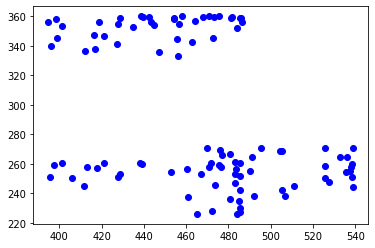

In [ ]:
points=100
coordinates=2 # x and y
k=3                                         # number of centres to distribute data
data, data_c = create_data(points,coordinates,k)  # Random data matrix 
class_data,data = data_praparing(data,data_c,k)   # distributed data matrix with gaussian distribution


plt.scatter(data[:,0],data[:,1], c='blue')  

**Results**

In [ ]:
import sys
print("please enter centres")
centres = int(input())
print("Please enter number of clusterings")
nb_of_kmean= int(input())

print(" Please enter 'plot' if you want " + str(nb_of_kmean) + " clustering with " + str(centres) + " diffent initial means with plots or 'result' to get direct result")
case=input()
while 1:
  if case == 'plot':
    clusters_list = n_k_means_plot(centres , nb_of_kmean)
    print("Entropy of " + str(centres) + "_means: " + str(entropy(clusters_list)))     #First measure
                                                        #Entropy of 'n_of_kmean' centres-means of 'n_of_kmeans' different initial centre points 
    quality = np.array(Quality(clusters_list))                                    #second measure
                                                        #Quality list of each clustering with different centre points (n times)
    for i in range (len(quality)):
     print(str(i+1) + "th clustering quality is : " + str(quality[i])  )
    sys.exit("done") 
  if case == 'result':
    clusters_list = n_k_means(centres , nb_of_kmean)
    print("Entropy of " + str(centres) + "_means: " + str(entropy(clusters_list)))
    quality = np.array(Quality(clusters_list))
    for i in range (len(quality)):
      print(str(i+1) + "th clustering quality is : " + str(quality[i])  )
    sys.exit("done")  
  else : 
    print("Please enter valid input")
    case = input()


please enter centres
5
Please enter number of clusterings
32
 Please enter 'plot' if you want 32 clustering with 5 diffent initial means with plots or 'result' to get direct result
result
Entropy of 5_means: 3.5849625007211565
1th clustering quality is : 0.9377069077499616
2th clustering quality is : 0.9377069077499613
3th clustering quality is : 1.0215034123163518
4th clustering quality is : 0.9309460485117251
5th clustering quality is : 1.059854465947947
6th clustering quality is : 1.0159354406047783
7th clustering quality is : 0.9810908975558474
8th clustering quality is : 0.9309460485117251
9th clustering quality is : 1.0159354406047783
10th clustering quality is : 0.9345475121925658
11th clustering quality is : 0.9377069077499616
12th clustering quality is : 0.9309460485117251
13th clustering quality is : 0.9377069077499613
14th clustering quality is : 0.9309460485117251
15th clustering quality is : 0.9319267756616054
16th clustering quality is : 0.9875013831748229
17th clustering

SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
